In [1]:
#导入相应库
import tensorflow.compat.v1 as tf 
from IPython.display import Image
#tf.disable_eager_execution()  #关闭eager运算
#tf.disable_v2_behavior()    #禁用TensorFlow 2.x行为
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.disable_v2_behavior()
#清除default_graph和不断增加的节点
tf.reset_default_graph()

#路径
logdir="D:/log"


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# 区间变换,[0,100]化为[-1,1]
def Convert(data,Min,Max,size):
    # data：需要变换的数据或矩阵
    # Min：最小值        
    # Max：最大值
    #size:样本个数
    data = np.array(data)
    Size = size
    w = -2/(Min - Max)
    b = (Min + Max)/(Min - Max)
    for i in range(Size):
        data[i] = data[i]*w + b
    return data

In [4]:
#生成500个在0到100之间等差数
x_data=np.linspace(0,100,500)
x_data=Convert(x_data,0,100,500)#数据归一化
np.random.seed(5)  #设置随机数种子
#增设噪音,最大幅度0.4
y_data= 3.1234*x_data+2.98+np.random.randn(*x_data.shape) *0.4

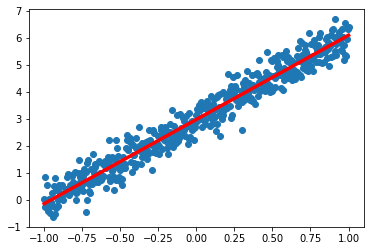

In [5]:
#分别画出数据散点图和所需的目标函数
plt.scatter(x_data,y_data)
plt.plot(x_data,2.98+3.1234*x_data,'r',linewidth=3.5)



In [6]:
#定义数据的占位符,x为特征值，y为标签值
x = tf.placeholder("float", name = "x")
y = tf.placeholder("float",name ="y")

In [9]:
#构造回归模型（实现预测计算）
def model(x,w,b):
    return tf.multiply(x,w)+b


In [11]:
#创建待优化变量
#w为斜率，b为截距
#构建线性函数的斜率，变量w
w = tf.Variable(1.0,name="w0")
#构建线性函数的截距，变量b
b = tf.Variable(0.0,name="b0")
#pred是预测值，前向计算
pred = model(x,w,b)

In [12]:
#定义均方差损失函数
def loss(x,y,w,b):
    err=model(x,w,b)-y
    squared_err=tf.square(err)#求平方，得出方差
    return tf.reduce_mean(squared_err)#求均方差
    

In [13]:
#训练模型
#设置训练超参数
train_epochs=10  #10轮训练
learning_rate=0.0001  #学习率
step = 0
display_step = 20   #显示的步数
loss_list = []   #初始化空列表，用于保存损失值

#采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

#梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [14]:
#声明回话
sess = tf.Session()

#变量初始化
init = tf.global_variables_initializer()
sess.run(init)

Train Epoch:1  Step:20  loss:1.611653924
Train Epoch:1  Step:40  loss:3.236391306
Train Epoch:1  Step:60  loss:1.921330571
Train Epoch:1  Step:80  loss:1.965031028
Train Epoch:1  Step:100  loss:3.466061115
Train Epoch:1  Step:120  loss:3.303235054
Train Epoch:1  Step:140  loss:6.618517876
Train Epoch:1  Step:160  loss:4.685081959
Train Epoch:1  Step:180  loss:3.949376583
Train Epoch:1  Step:200  loss:7.414556503
Train Epoch:1  Step:220  loss:4.868532181
Train Epoch:1  Step:240  loss:5.237471581
Train Epoch:1  Step:260  loss:8.697170258
Train Epoch:1  Step:280  loss:7.911894321
Train Epoch:1  Step:300  loss:9.499566078
Train Epoch:1  Step:320  loss:10.367527962
Train Epoch:1  Step:340  loss:10.688569069
Train Epoch:1  Step:360  loss:12.416735649
Train Epoch:1  Step:380  loss:12.285176277
Train Epoch:1  Step:400  loss:20.342725754
Train Epoch:1  Step:420  loss:13.865956306
Train Epoch:1  Step:440  loss:17.740264893
Train Epoch:1  Step:460  loss:19.106615067
Train Epoch:1  Step:480  loss:

Train Epoch:8  Step:3900  loss:8.066586494
Train Epoch:8  Step:3920  loss:4.112961292
Train Epoch:8  Step:3940  loss:6.209924221
Train Epoch:8  Step:3960  loss:6.907847881
Train Epoch:8  Step:3980  loss:7.780960560
Train Epoch:8  Step:4000  loss:10.746232033
Train Epoch:9  Step:4020  loss:0.003495516
Train Epoch:9  Step:4040  loss:0.312051088
Train Epoch:9  Step:4060  loss:0.013212077
Train Epoch:9  Step:4080  loss:0.009818281
Train Epoch:9  Step:4100  loss:0.277545899
Train Epoch:9  Step:4120  loss:0.202294096
Train Epoch:9  Step:4140  loss:1.372691512
Train Epoch:9  Step:4160  loss:0.532490253
Train Epoch:9  Step:4180  loss:0.268751979
Train Epoch:9  Step:4200  loss:1.487716913
Train Epoch:9  Step:4220  loss:0.447185487
Train Epoch:9  Step:4240  loss:0.513010025
Train Epoch:9  Step:4260  loss:1.801809072
Train Epoch:9  Step:4280  loss:1.372989535
Train Epoch:9  Step:4300  loss:1.979975939
Train Epoch:9  Step:4320  loss:2.284162045
Train Epoch:9  Step:4340  loss:2.334532261
Train Epoc

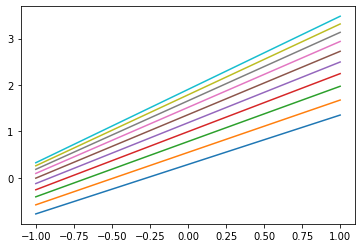

In [15]:
#开始进行迭代训练
for epoch in range(train_epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss = sess.run([optimizer,loss_function],feed_dict = {x:xs , y:ys})
        loss_list.append(loss)     #将损失函数值增加到列表末端
        step += 1     #步长加1
        if step % display_step == 0:
            print("Train Epoch:{0:d}  Step:{1:d}  loss:{2:.9f}".format(epoch+1,step,loss))
            
    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    plt.plot(x_data,w0temp*x_data +b0temp)    #画预测图
    
print("w:",sess.run(w))
print("b:",sess.run(b))

In [16]:
#通过训练出的模型预测 x=5.79 时 y 的值
x_test = 5.79

predict = sess.run(pred,feed_dict={x:x_test})
print("预测值：{:.9f}".format(predict))

target = 3.1234 * x_test + 2.98 
print("目标值：{:.9f}".format(target))


预测值：11.047523499
目标值：21.064486000


In [17]:
#生成一个写日志的writer,并将当前的tensorflow计算图写入日志
writer = tf.summary.FileWriter(logdir,tf.get_default_graph())
writer.close()

In [18]:
#备注:此处路径不能直接用windows自带的'\'，而应当是'\\'
Image(filename = 'D:\\Anaconda\\document\\prompt_xpc.png', width=600, height=600) #prompt命令图

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Anaconda\\document\\prompt_xpc.png'

In [ ]:
Image(filename = 'D:\\Anaconda\\document\\result_xpc.png', width=600, height=600)   #tensorboard可视化结果图